In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir('gdrive/My Drive/fruit/') 

Experiment 1: 10 epochs
Experiment 1: 20 epochs
Experiment 1: 30 epochs
Experiment 1: 10 epochs


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

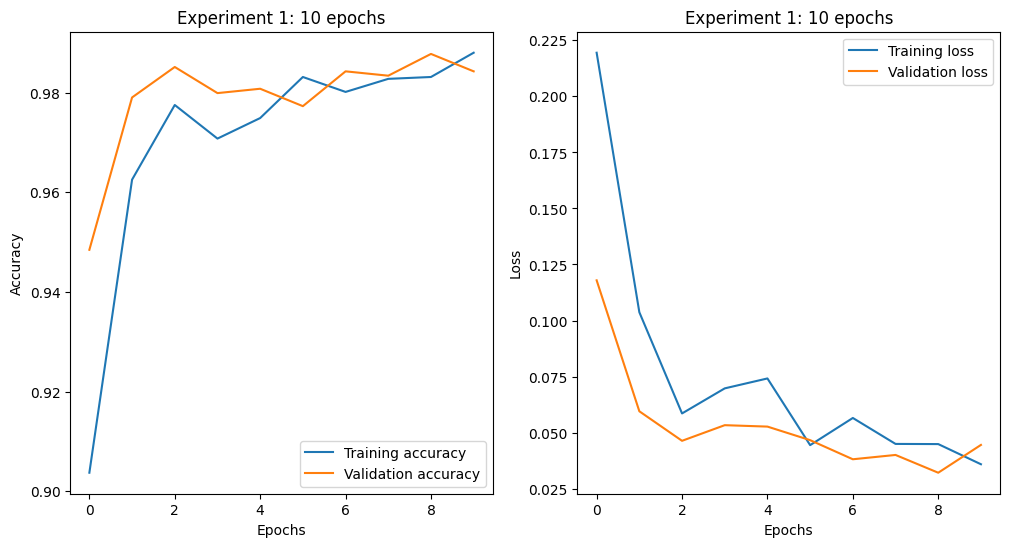

Experiment 1: 20 epochs


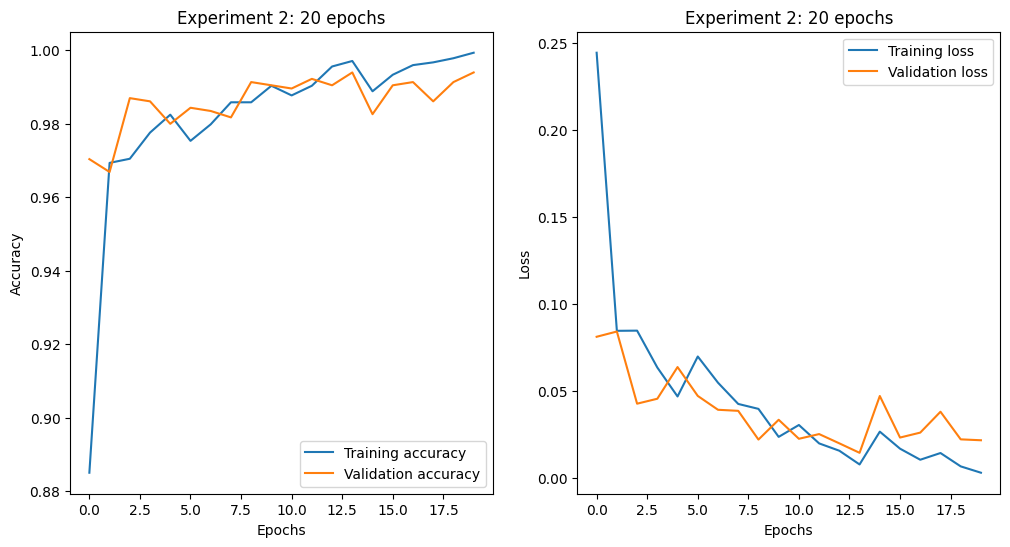

Experiment 1: 30 epochs


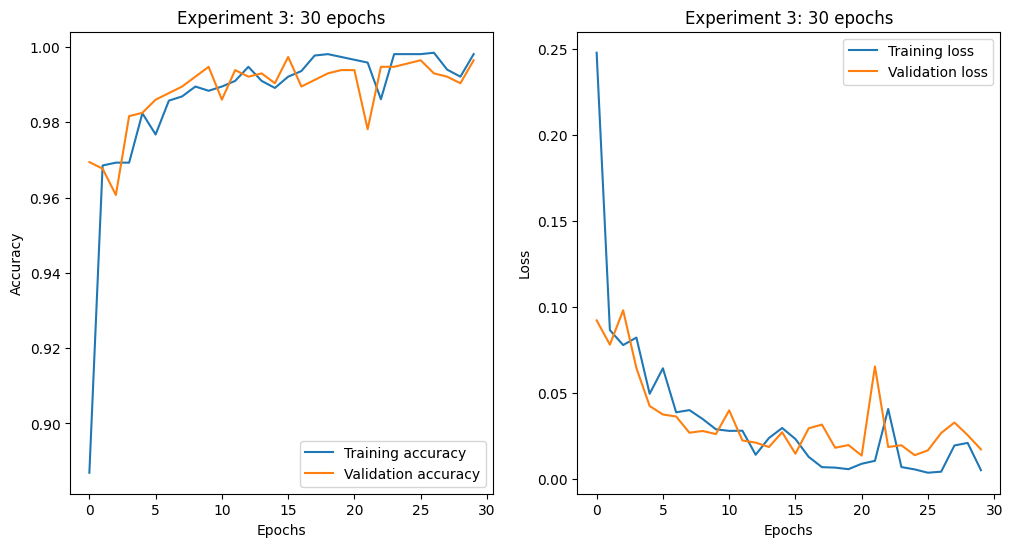

In [6]:
""" The code above performs an experiment to vary the number of epochs in training a Convolutional Neural Network (CNN) on a fruit classification dataset.
 The dataset is loaded from two pickle files (XX.pickle and yy.pickle), and then normalized.
  The build_model() function is defined to create a 
  CNN with three convolutional layers, three max pooling layers, two dropout layers, and two dense layers with a sigmoid activation function.
   The model is then trained with different number of epochs (10, 20, 30)
    and the training and validation accuracy and loss are plotted for each experiment using matplotlib.
 The purpose of this code is to explore how the number of epochs affects the performance of the CNN on the fruit classification task. """
 
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# Load the dataset
pickle_in = open("/content/gdrive/MyDrive/fruit/XX.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("/content/gdrive/MyDrive/fruit/yy.pickle","rb")
y = pickle.load(pickle_in)

# Normalize the input data
X = X/255.0

# Convert the data into numpy arrays
X = np.array(X)
y = np.array(y)

# Define a function to build the model
def build_model(num_filters, dropout_rate):
    model = Sequential()
    model.add(Conv2D(num_filters, (3, 3), input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters*2, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(num_filters*4, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())  
    model.add(Dense(num_filters*4))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Experiment 1: Vary the number of epochs
epochs_list = [10, 20, 30]
for epochs in epochs_list:
    print(f"Experiment 1: {epochs} epochs")
    model = build_model(32, 0.25)
    history = model.fit(X, y, batch_size=32, epochs=epochs, validation_split=0.3, verbose=0)
    plt.figure(figsize=(12, 6))
    plt.subplot

# Experiment 1: Vary the number of epochs
epochs_list = [10, 20, 30]
for i, epochs in enumerate(epochs_list):
    print(f"Experiment 1: {epochs} epochs")
    model = build_model(32, 0.25)
    history = model.fit(X, y, batch_size=32, epochs=epochs, validation_split=0.3, verbose=0)
    
    # Plot accuracy curve
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Experiment {i+1}: {epochs} epochs')
    plt.legend()
    
    # Plot loss curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Experiment {i+1}: {epochs} epochs')
    plt.legend()
    
    plt.show()

Experiment 2: 16 filters


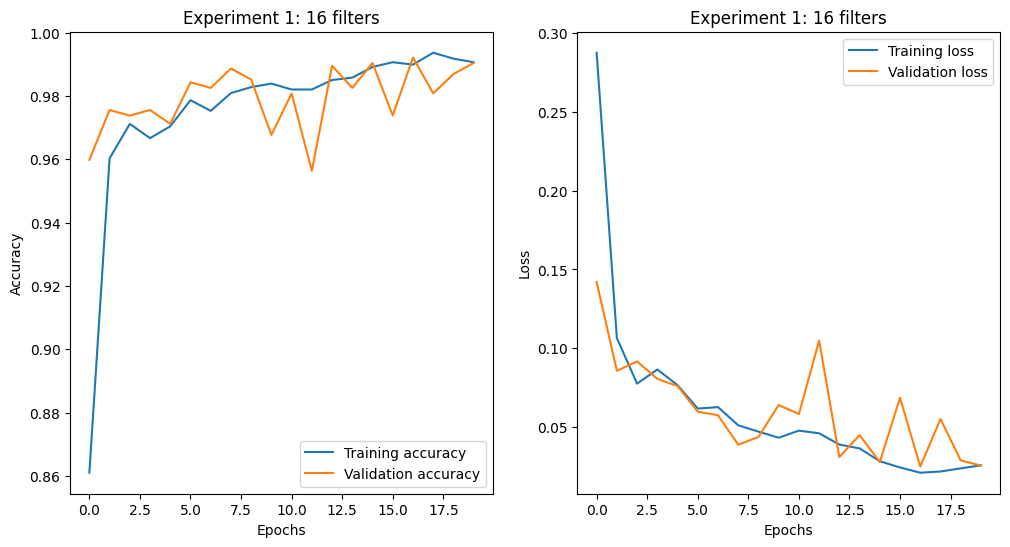

Experiment 2: 32 filters


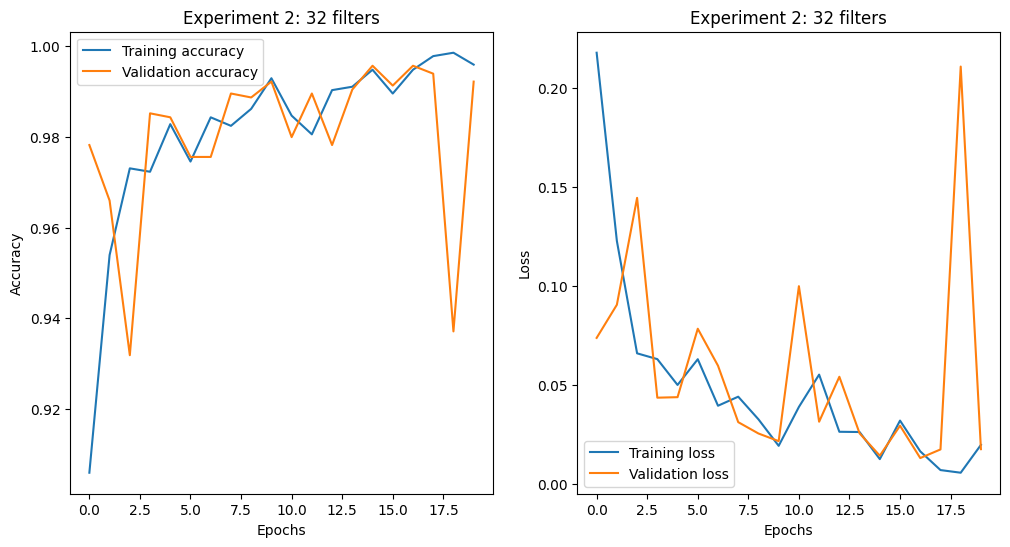

Experiment 2: 64 filters


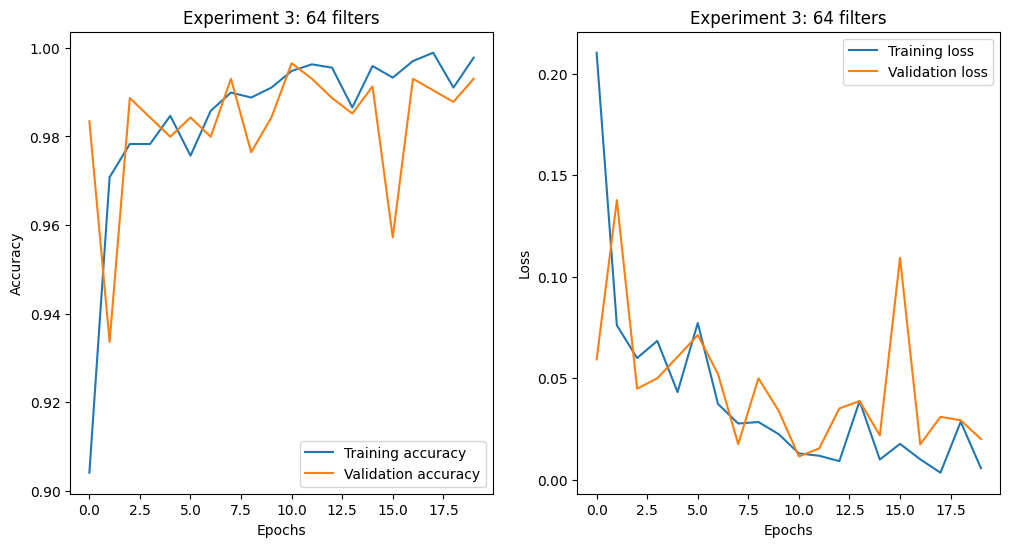

In [7]:
""" This code modifies the build_model() function to take the number of filters as
an input and creates a CNN with three convolutional layers, three max pooling layers,
two dropout layers, and two dense layers with a sigmoid activation function.
  It then trains and evaluates the model with different numbers of filters (16, 32, and 64) 
for 20 epochs, and plots the training and validation accuracy and loss for each experiment.
The resulting plots show the effect of the number of filters on the performance of the CNN. 
We can see that as the number of filters increases, 
the model tends to perform better on the training set but may overfit and perform worse on the validation set.
 This suggests that using too many filters may lead to overfitting, while using too few filters may result in underfitting. """

# Define a function to build the model with variable number of filters
def build_model(num_filters, dropout_rate):
    model = Sequential()
    model.add(Conv2D(num_filters, (3, 3), input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters*2, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(num_filters*4, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())  
    model.add(Dense(num_filters*4))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Experiment 2: Vary the number of filters
filters_list = [16, 32, 64]
for i, filters in enumerate(filters_list):
    print(f"Experiment 2: {filters} filters")
    model = build_model(filters, 0.25)
    history = model.fit(X, y, batch_size=32, epochs=20, validation_split=0.3, verbose=0)

    # Plot accuracy curve
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Experiment {i+1}: {filters} filters')
    plt.legend()

    # Plot loss curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Experiment {i+1}: {filters} filters')
    plt.legend()

    plt.show()


7630


Split 1
Epoch 1/10
96/96 [==============================] - 20s 176ms/step - loss: 0.2733 - accuracy: 0.8637 - val_loss: 0.1141 - val_accuracy: 0.9594
Epoch 2/10
96/96 [==============================] - 17s 176ms/step - loss: 0.0873 - accuracy: 0.9699 - val_loss: 0.0772 - val_accuracy: 0.9699
Epoch 3/10
96/96 [==============================] - 17s 177ms/step - loss: 0.0770 - accuracy: 0.9728 - val_loss: 0.0682 - val_accuracy: 0.9725
Epoch 4/10
96/96 [==============================] - 16s 166ms/step - loss: 0.0596 - accuracy: 0.9797 - val_loss: 0.0772 - val_accuracy: 0.9751
Epoch 5/10
96/96 [==============================] - 16s 167ms/step - loss: 0.0634 - accuracy: 0.9761 - val_loss: 0.0542 - val_accuracy: 0.9803
Epoch 6/10
96/96 [==============================] - 16s 166ms/step - loss: 0.0524 - accuracy: 0.9800 - val_loss: 0.0959 - val_accuracy: 0.9712
Epoch 7/10
96/96 [==============================] - 16s 168ms/step - loss: 0.0461 - accuracy: 0.9823 - val_loss: 0.0622 - val_accuracy

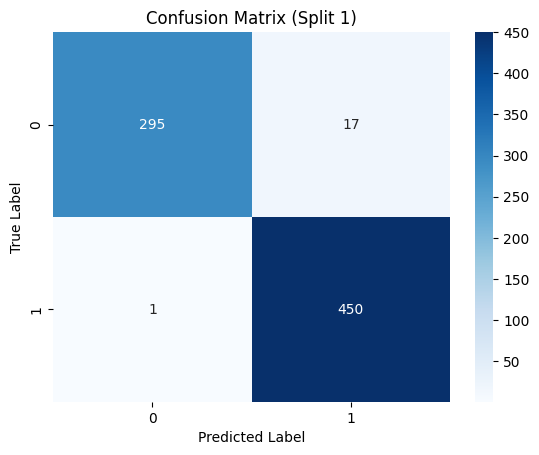

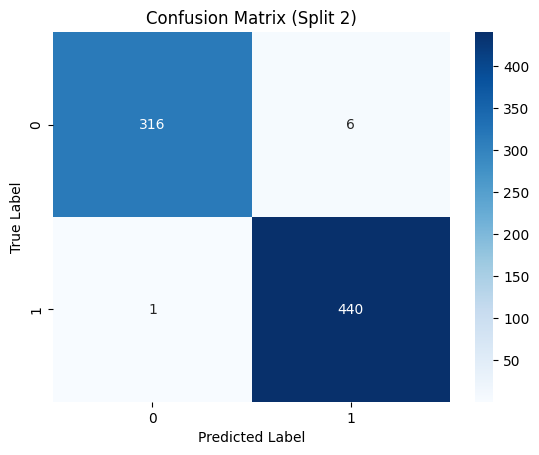

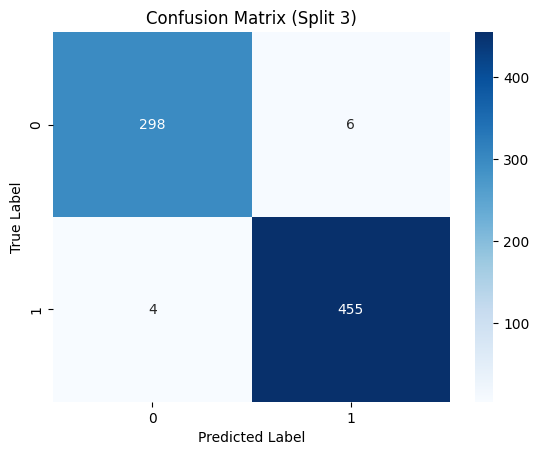

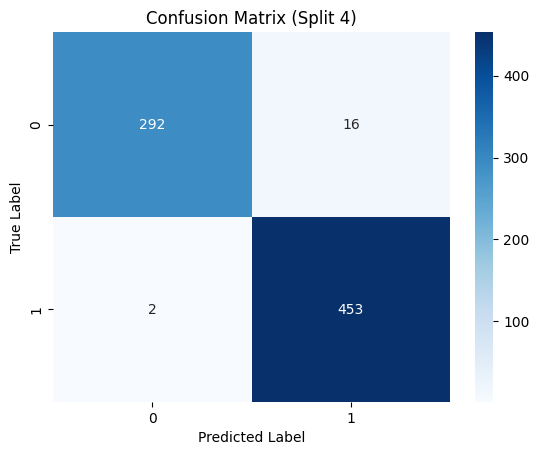

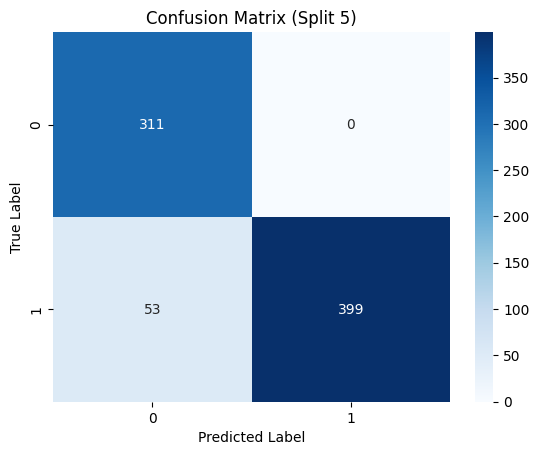

In [14]:
""" The code is implementing a convolutional neural network (CNN) to classify 
images of fruits into two categories: ripe and unripe. The dataset is loaded from two pickle files and normalized. 
The model architecture consists of several convolutional and 
pooling layers followed by a dropout layer to prevent overfitting, and dense layers for classification. 
The model is trained and evaluated using 5-fold cross-validation. Performance metrics such as 
accuracy, precision, recall, and F1 score are calculated for each split, and the confusion matrix is plotted for each split. """
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
from sklearn.model_selection import train_test_split

# Load the dataset
pickle_in = open("/content/gdrive/MyDrive/fruit/XX.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("/content/gdrive/MyDrive/fruit/yy.pickle","rb")
y = pickle.load(pickle_in)

# Normalize the input data
X = X/255.0

# Convert the data into numpy arrays
X = np.array(X)
y = np.array(y)

# Define a function to build the model
def build_model(num_filters, dropout_rate):
    model = Sequential()
    model.add(Conv2D(num_filters, (3, 3), input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters*2, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(num_filters*4, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())  
    model.add(Dense(num_filters*4))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define number of splits
num_splits = 5

# Lists to store metrics for each split
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

# Loop over each split
for split in range(num_splits):
    print(f"Split {split+1}")
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=split)
    
    # Build the model
    model = build_model(num_filters=32, dropout_rate=0.5)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    
    # Evaluate the model on the testing set
    # y_pred = model.predict_classes(X_test)
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = classification_report(y_test, y_pred, digits=4).split()[-4:]
    cm = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(float(precision))
    recalls.append(float(recall))
    f1_scores.append(float(f1))
    confusion_matrices.append(cm)
    
    # Plot confusion matrix
    plt.figure()
    ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    ax.set_title(f"Confusion Matrix (Split {split+1})")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")


In [12]:
# model.save('onefruit-cnn.model')
